# Linear Regression on Aggregated Data

In [13]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:

df_aggregated = pd.read_csv('cluster_labels_k6.csv')  
df_aggregated

,key,Customer Age,Quantity,Revenue,Cost,Unit Price,Unit Cost,Profit Margin,Cluster,Customer Gender,Country,State
0,17.0_F_France_Essonne,17.0,6.0,779.0,801.0,129.833333,133.500000,0.090187,0,F,France,Essonne
1,17.0_F_France_Hauts de Seine,17.0,7.0,1355.0,1181.0,312.458333,272.875000,0.152743,0,F,France,Hauts de Seine
2,17.0_F_France_Loiret,17.0,3.0,43.0,44.0,14.333333,14.670000,-0.023256,0,F,France,Loiret
3,17.0_F_France_Nord,17.0,6.0,1284.0,1380.0,283.777778,300.000000,-0.121049,0,F,France,Nord
4,17.0_F_France_Seine (Paris),17.0,10.0,1037.0,907.0,91.466667,82.266000,0.045366,0,F,France,Seine (Paris)
...,...,...,...,...,...,...,...,...,...,...,...,...
1622,85.0_M_Germany_Nordrhein-Westfalen,85.0,4.0,529.0,414.0,112.500000,88.000000,0.213675,2,M,Germany,Nordrhein-Westfalen
1623,85.0_M_United Kingdom_England,85.0,7.0,1574.0,1315.0,205.000000,171.500000,0.185948,2,M,United Kingdom,England
1624,86.0_F_France_Yveline,86.0,4.0,331.0,333.0,84.166666,91.500000,-0.081755,2,F,France,Yveline
1625,86.0_M_Germany_Saarland,86.0,4.0,4052.0,2479.0,1709.666667,1027.165000,0.367574,4,M,Germany,Saarland


In [15]:
df_aggregated_encoded = pd.get_dummies(df_aggregated, columns=['Cluster', 'Customer Gender', 'Country', 'State'], drop_first=True)

X = df_aggregated_encoded[['Cluster_1', 'Cluster_2', 'Cluster_3','Cluster_4','Cluster_5']]

				
y = df_aggregated_encoded['Revenue']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R^2 Score: 0.882929645296298


TypeError: got an unexpected keyword argument 'squared'

In [55]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=True)

display(coef_df)


,Feature,Coefficient
1,Cluster_2,-1656.706795
3,Cluster_4,733.146809
4,Cluster_5,6966.724974
2,Cluster_3,36091.476476
0,Cluster_1,90051.635509


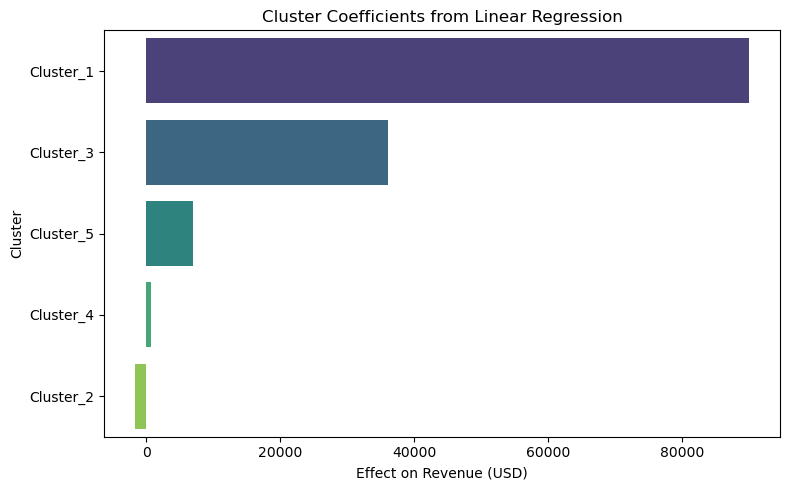

In [62]:
X = df_aggregated_encoded[['Cluster_1', 'Cluster_2', 'Cluster_3', 'Cluster_4', 'Cluster_5']]
y = df_aggregated_encoded['Revenue']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Create coefficient DataFrame
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
# Display barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Cluster Coefficients from Linear Regression')
plt.xlabel('Effect on Revenue (USD)')
plt.ylabel('Cluster')
plt.tight_layout()
plt.show()

* The linear regression model using cluster labels as predictors achieved an R² score of 0.88 and a Root Mean Squared Error (RMSE) of $6,971. This means that 88% of the variance in customer revenue can be explained by cluster membership alone, a very strong result that highlights the effectiveness of the PCA + KMeans clustering on the aggeregated data. 

The chart above visualizes how each cluster compares to the baseline group (Cluster 0). Specifically:

* Cluster 1 is associated with the highest revenue increase, contributing approximately $90,000 more than Cluster 0 on average.

* Cluster 3 also shows a strong positive effect ($36,000+), while Clusters 4 and 5 offer more modest lifts.

* Cluster 2, on the other hand, is slightly less profitable than the baseline, with a negative coefficient of about $1,656.

✅ Takeaway:

The regression results confirm that the clusters identified through PCA and K-Means are more than abstract groupings. Instead, they correspond meaningfully to customer value. In the aggregated model, where customers are defined by unique combinations of age, gender, country, and state, the cluster labels alone explain 88.3% of the variance in revenue. This highlights the strength of behavioral segmentation at the customer level.

Notably, Cluster 1 and Cluster 3 are associated with substantially higher revenue compared to the baseline (Cluster 0), while Clusters 4 and 5 show modest gains. Cluster 2 is linked to slightly lower revenue. These distinctions reveal that clustering effectively captures differences in customer value, a contrast to the non-aggregated model, where clusters had minimal predictive power. Based on these results, it would make sense to prioritize customers in Cluster 1 and Cluster 3 for initiatives like upselling, loyalty programs, or premium product promotions.

# OLS

In [59]:
X = df_aggregated_encoded[['Customer Age', 'Customer Gender_M'] + 
						  [col for col in df_aggregated_encoded.columns if col.startswith('State_') or col.startswith('Country_')]]
y = df_aggregated_encoded['Revenue']

X = X.apply(pd.to_numeric, errors='coerce')

X = X.dropna()
y = y.loc[X.index]

X = sm.add_constant(X, has_constant='add')

y = y.loc[X.index]

X = X.astype(float)
y = y.astype(float)

model_OLS = sm.OLS(y, X).fit()

print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:                Revenue   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     38.53
Date:                Wed, 07 May 2025   Prob (F-statistic):          4.52e-222
Time:                        18:27:14   Log-Likelihood:                -17922.
No. Observations:                1627   AIC:                         3.594e+04
Df Residuals:                    1580   BIC:                         3.619e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

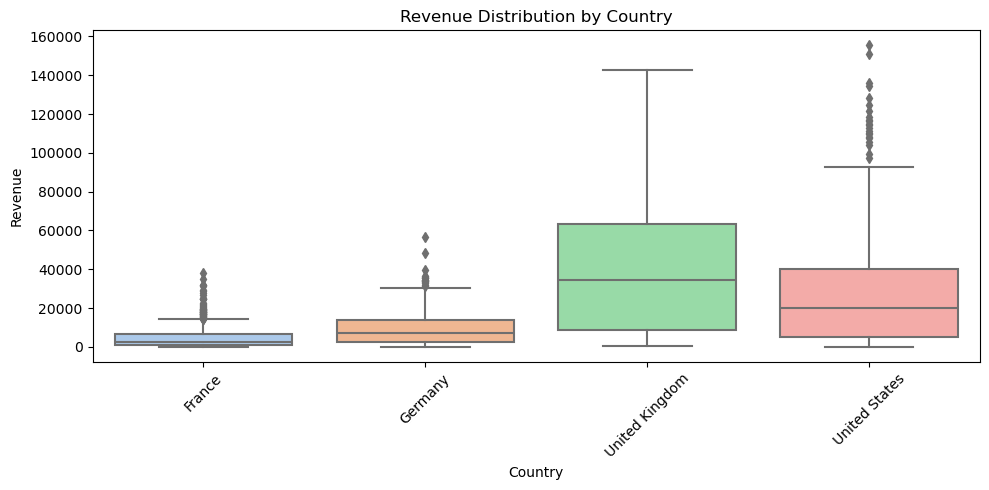

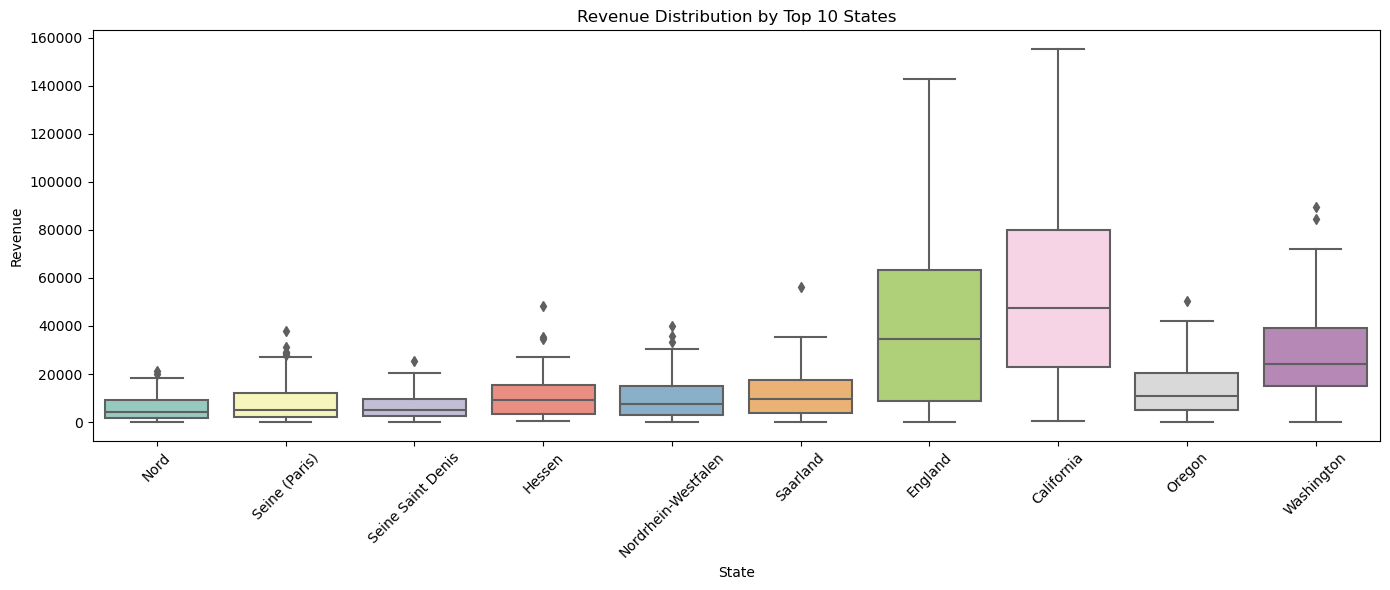

In [63]:
# Boxplot: Revenue by Country
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_aggregated, x='Country', y='Revenue', palette='pastel')
plt.title('Revenue Distribution by Country')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot: Revenue by State
plt.figure(figsize=(14, 6))
top_states = df_aggregated['State'].value_counts().nlargest(10).index
sns.boxplot(data=df_aggregated[df_aggregated['State'].isin(top_states)],
            x='State', y='Revenue', palette='Set3')
plt.title('Revenue Distribution by Top 10 States')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In addition to cluster labels, we included demographic and geographic features such as Customer Age, Gender, Country, and State in the regression model to explore their predictive power on revenue.

📌 Customer Age was significantly negatively associated with revenue (p < 0.001), suggesting that younger customers tend to spend more. Specifically, each additional year of age was associated with a $367 decrease in expected revenue.

📌 Gender was not a significant predictor of revenue (p = 0.53), indicating that spending behavior does not vary meaningfully by gender in this dataset.

📍 Geographic Trends:

Customers in California and Saarland (Germany) were associated with significantly higher revenue, with positive coefficients of approximately $54,530 and $4,655 respectively.

Customers in Brandenburg (Germany) showed a significant negative relationship, with an average revenue drop of $5,428.

📉 The boxplots below support these patterns, showing higher revenue distributions in key regions like the United States and specific states like California, while some other states show more modest or flat spending patterns.

### Takeaways for the Business 

1. Younger customers represent a key revenue opportunity.
Since revenue declines by roughly $367 for each additional year of age, marketing efforts might be more effective when tailored toward younger age groups, especially those under 35. Campaigns could emphasize trend-driven or lifestyle-based messaging that resonates with this audience.

2. Gender-specific strategies may not be necessary.
Given that gender was not a significant predictor of revenue, there’s little evidence to support separate marketing strategies based solely on gender. Resources might be better allocated toward factors with stronger predictive value, such as region or age.

3. California and Saarland are high-value markets.
Customers in these regions spend significantly more, with California standing out as the top revenue driver. These areas could be prioritized for future promotions, exclusive product releases, or localized advertising.

4. Brandenburg, Germany may require a different approach.
Customers from Brandenburg were associated with notably lower revenue. This could indicate a need for revised pricing, promotions, or product offerings to better align with the preferences or spending capacity of this region.

5. Location-based segmentation adds value.
The strong variation in revenue by state and country suggests that geographic targeting is a meaningful strategy. Marketing teams can use this to allocate budgets more effectively and design region-specific campaigns that reflect local demand.

# Comparison of Raw versus Aggregated Linear Regression

On a per-transaction basis, cluster membership does not strongly predict revenue (R² = 0.016).

However, after aggregation by customer, the same clusters explain 88.3% of revenue variation. This implies that clusters are more meaningful at the customer level — likely because aggregation reveals cumulative patterns (spending habits, preferences) that aren't clear from single transactions.

* Clustering on transaction-level data alone shows minimal predictive value for revenue.

* However, after aggregation, cluster membership becomes highly predictive of revenue.

* Customer Age and State also show significant influence post-aggregation.

* Business insight: aggregated cluster analysis is a powerful lens for segmenting and targeting profitable customers.
